In [2]:
from ibsfunctions import *

%load_ext autoreload
%autoreload 2

In [3]:
direc = 'C:/Users/Bas/Documents/Sourcetree repos/ibs/results/'
fig_direc = 'C:/Users/Bas/Documents/Sourcetree repos/ibs/figures/'

theta_real = {m : np.loadtxt(direc + '../matlab/theta_real_' + m + '.txt',delimiter=',') for m in models}

In [4]:
samples_used = {model: [[load_samples(model,Ns,i,direc) for i in range(1,Npars[model]+1)] for Ns in Nsamples[model]['ibs']]
                for model in models}

In [5]:
nll_best = {model: { method: [[load_nll_best(model,method,Ns,i,direc) for i in range(1,Npars[model]+1)] for Ns in Nsamples[model][method]] 
                 for method in methods[model]}
         for model in models}

In [6]:
theta = {model: { method: [[load_theta(model,method,Ns,i,direc) for i in range(1,Npars[model]+1)] for Ns in Nsamples[model][method]] 
                 for method in methods[model]}
         for model in models}

In [7]:
means = {model: { method: get_means(theta[model][method])
                 for method in methods[model]}
         for model in models}

In [8]:
stds = {model: { method: get_stds(theta[model][method])
                 for method in methods[model]}
         for model in models}

In [9]:
absdevs = {model: { method: get_absdevs(theta[model][method],theta_real[model])
                 for method in methods[model]}
         for model in models}

In [10]:
rmses = {model: { method: np.sqrt((means[model][method]-theta_real[model][None,:,:])**2 + stds[model][method]**2)
                 for method in methods[model]}
         for model in models}

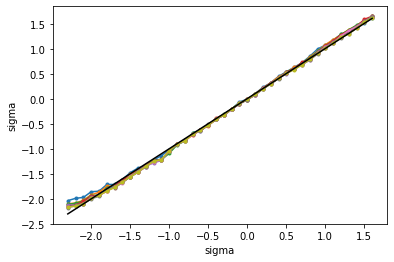

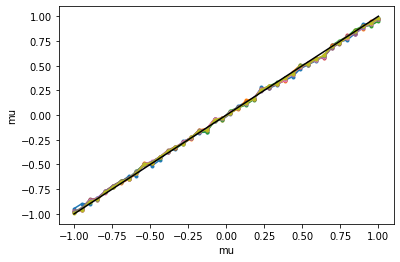

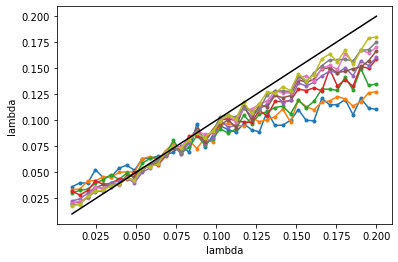

In [11]:
plot_param_recovery('psycho','ibs',theta_real,means)

In [ ]:
plot_param_recovery('psycho','fixed')

In [ ]:
plot_param_recovery('psycho','exact')

In [ ]:
plot_param_recovery('vstm','ibs')

In [ ]:
plot_param_recovery('vstm','fixed')

In [ ]:
plot_param_recovery('vstm','exact')

In [ ]:
plot_param_recovery('fourinarow','ibs')

In [ ]:
plot_param_recovery('fourinarow','fixed')

In [ ]:
plot_absdevs('psycho')

In [ ]:
plot_rmses('psycho')

In [ ]:
plot_absdevs('vstm')

In [ ]:
plot_rmses('vstm')

In [ ]:
plot_absdevs('fourinarow')

In [ ]:
plot_rmses('fourinarow')

In [ ]:
plot_mean_and_std('psycho',0,[['exact',0],['ibs',1],['fixed',10]])

In [ ]:
plot_mean_and_std('psycho',1,[['exact',0],['ibs',1],['fixed',1]])

In [ ]:
plot_mean_and_std('psycho',2,[['exact',0],['ibs',5],['fixed',20]])

In [ ]:
plot_mean_and_std('vstm',0,[['exact',0],['ibs',1],['fixed',35]])

In [ ]:
plot_mean_and_std('vstm',1,[['exact',0],['ibs',3],['fixed',50]])

In [ ]:
plot_mean_and_std('fourinarow',0,[['ibs',1],['fixed',50]])

In [ ]:
plot_mean_and_std('fourinarow',1,[['ibs',1],['fixed',50]])

In [ ]:
plot_mean_and_std('fourinarow',2,[['ibs',1],['fixed',50]])

In [ ]:
all_ibs_curves = [['ibs',n] for n in Nsamples['psycho']['ibs']]
plot_nll_best('psycho',0,all_ibs_curves,True)
plot_nll_best('psycho',1,all_ibs_curves,True)
plot_nll_best('psycho',2,all_ibs_curves,True)

In [ ]:
all_fixed_curves = [['fixed',n] for n in Nsamples['psycho']['fixed']]
plot_nll_best('psycho',0,all_fixed_curves,True)
plot_nll_best('psycho',1,all_fixed_curves,True)
plot_nll_best('psycho',2,all_fixed_curves,True)

In [ ]:
plot_nll_best('psycho',0,[['ibs',5],['fixed',35],['fixed',50]],True)

In [ ]:
plot_loglik_loss('psycho')

In [ ]:
plot_loglik_loss('vstm')